In [168]:
import pandas as pd  

df = pd.read_csv('preprocessed_data.csv')

df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,rentZestimate,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView
0,90049,11645 Montana Ave APT 229,CONDO,1973,4645.390594,79.432065,1,1.0,3.0,"['Tile', 'Wood']",...,2999.0,"[('2022-08-12', 699000)]",3050,4,1,1,1,0,1,1
1,90066,4040 Grand View Blvd UNIT 15,TOWNHOUSE,1961,11561.886452,78.131423,2,1.5,3.0,['Other'],...,3997.0,"[('2015-10-21', 450000), ('2005-04-07', 396000)]",3100,0,1,1,0,0,0,0
2,91303,7305 Milwood Ave APT 3,CONDO,1981,90.301716,90.301716,2,1.0,3.2,[],...,3499.0,"[('2009-11-13', 85000), ('2007-04-18', 299000)...",2800,0,1,1,0,0,0,0
3,91040,8701 Hillrose St,SINGLE_FAMILY,1945,7098.170143,129.320976,2,1.5,1.0,[],...,3781.0,"[('2021-06-29', 3350), ('2019-01-22', 3150)]",3600,2,0,0,0,0,0,0
4,91325,17123 Roscoe Blvd UNIT 2,APARTMENT,1971,30031.677454,127.091304,3,2.0,3.2,[],...,3170.0,"[('2011-11-28', 140000), ('2011-09-16', 151300...",3100,2,1,1,1,0,0,0


In [169]:
df.columns

Index(['zipcode', 'streetAddress', 'homeType', 'yearBuilt', 'lotAreaValue',
       'livingAreaValue', 'bedrooms', 'bathrooms', 'stories', 'flooring',
       'heating', 'cooling', 'fireplaceFeatures', 'taxAssessedValue',
       'zestimate', 'rentZestimate', 'sold-history', 'price',
       'parkingCapacity', 'hasCooling', 'hasHeating', 'hasFireplace',
       'hasPrivatePool', 'hasSpa', 'hasView'],
      dtype='object')

### Distributions

In [170]:
def calc_num_of_bins_freedman_rule(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    binwidth = 2 * iqr / (len(data) ** (1/3))
    num_bins = int((max(data) - min(data)) / binwidth)
    return num_bins
    
def calc_num_of_bins_scott_rule(data):
    num_bins = int((max(data) - min(data)) / (3.5 * np.std(data) / len(data) ** (1/3)))
    return num_bins

def calc_num_of_bins_sturges_rule(data):
    num_bins = int(np.log2(len(data)) + 1)
    return num_bins

def calc_binwidth(data, num_bins):
    binwidth = (max(data) - min(data)) / num_bins
    return binwidth

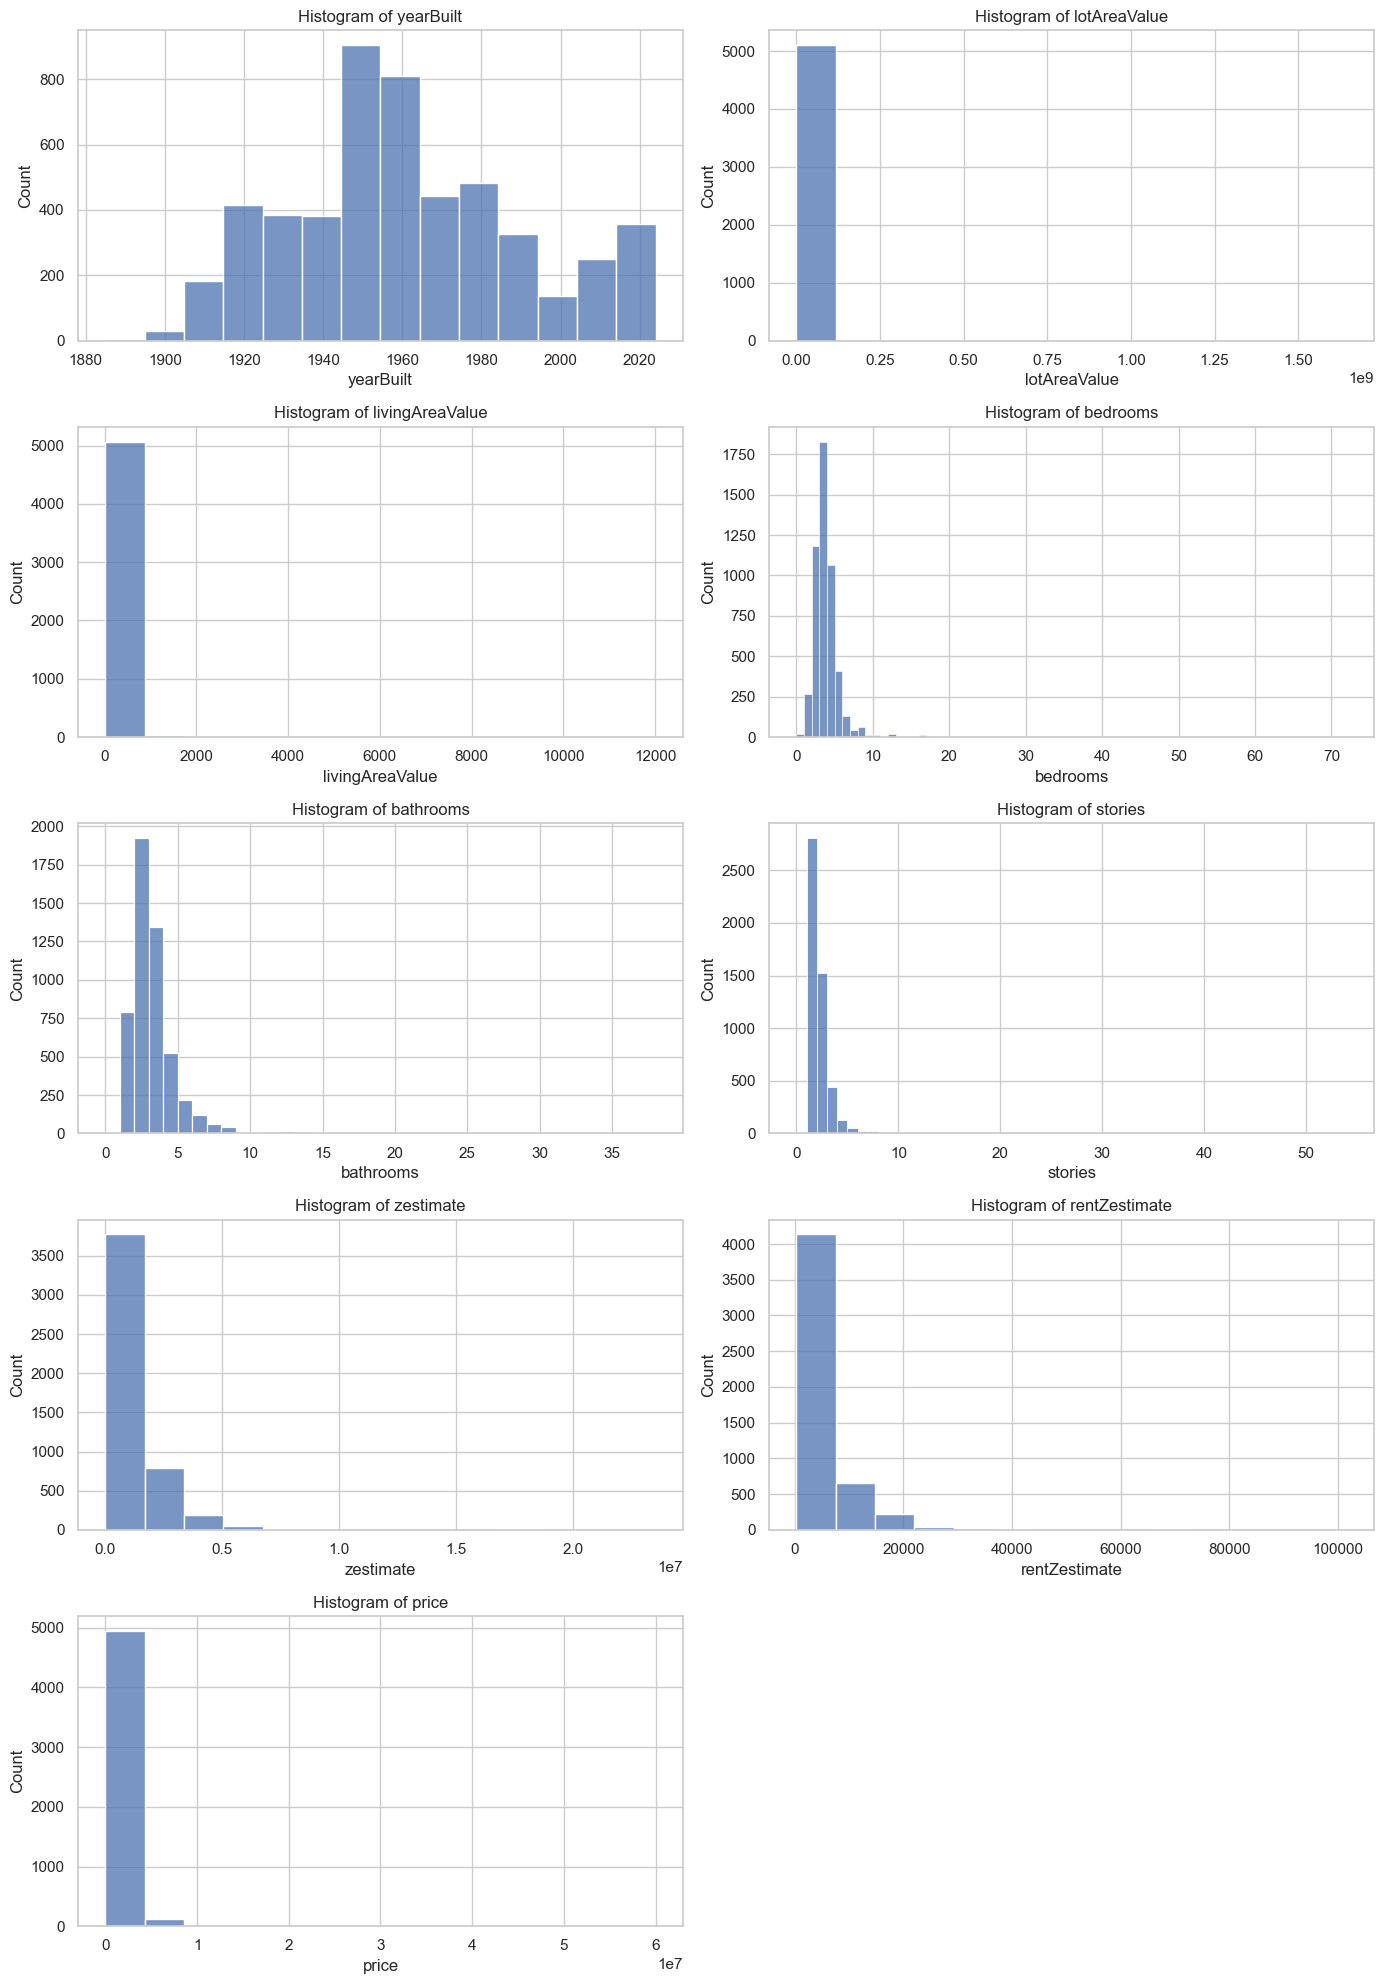

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


features = ["yearBuilt", "lotAreaValue", "livingAreaValue", "bedrooms", "bathrooms", "stories",
            "zestimate", "rentZestimate", "price"]

num_features = len(features)

num_cols = 2
num_rows = int(np.ceil(num_features / num_cols))

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    if feature in ["bedrooms", "bathrooms", "stories"]:
        bins = range(math.ceil(min(df[feature])), math.ceil(max(df[feature])) + 1)
        sns.histplot(df[feature], bins=bins, kde=False, ax=axes[i])
    else:
        sns.histplot(df[feature], bins='sturges', kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

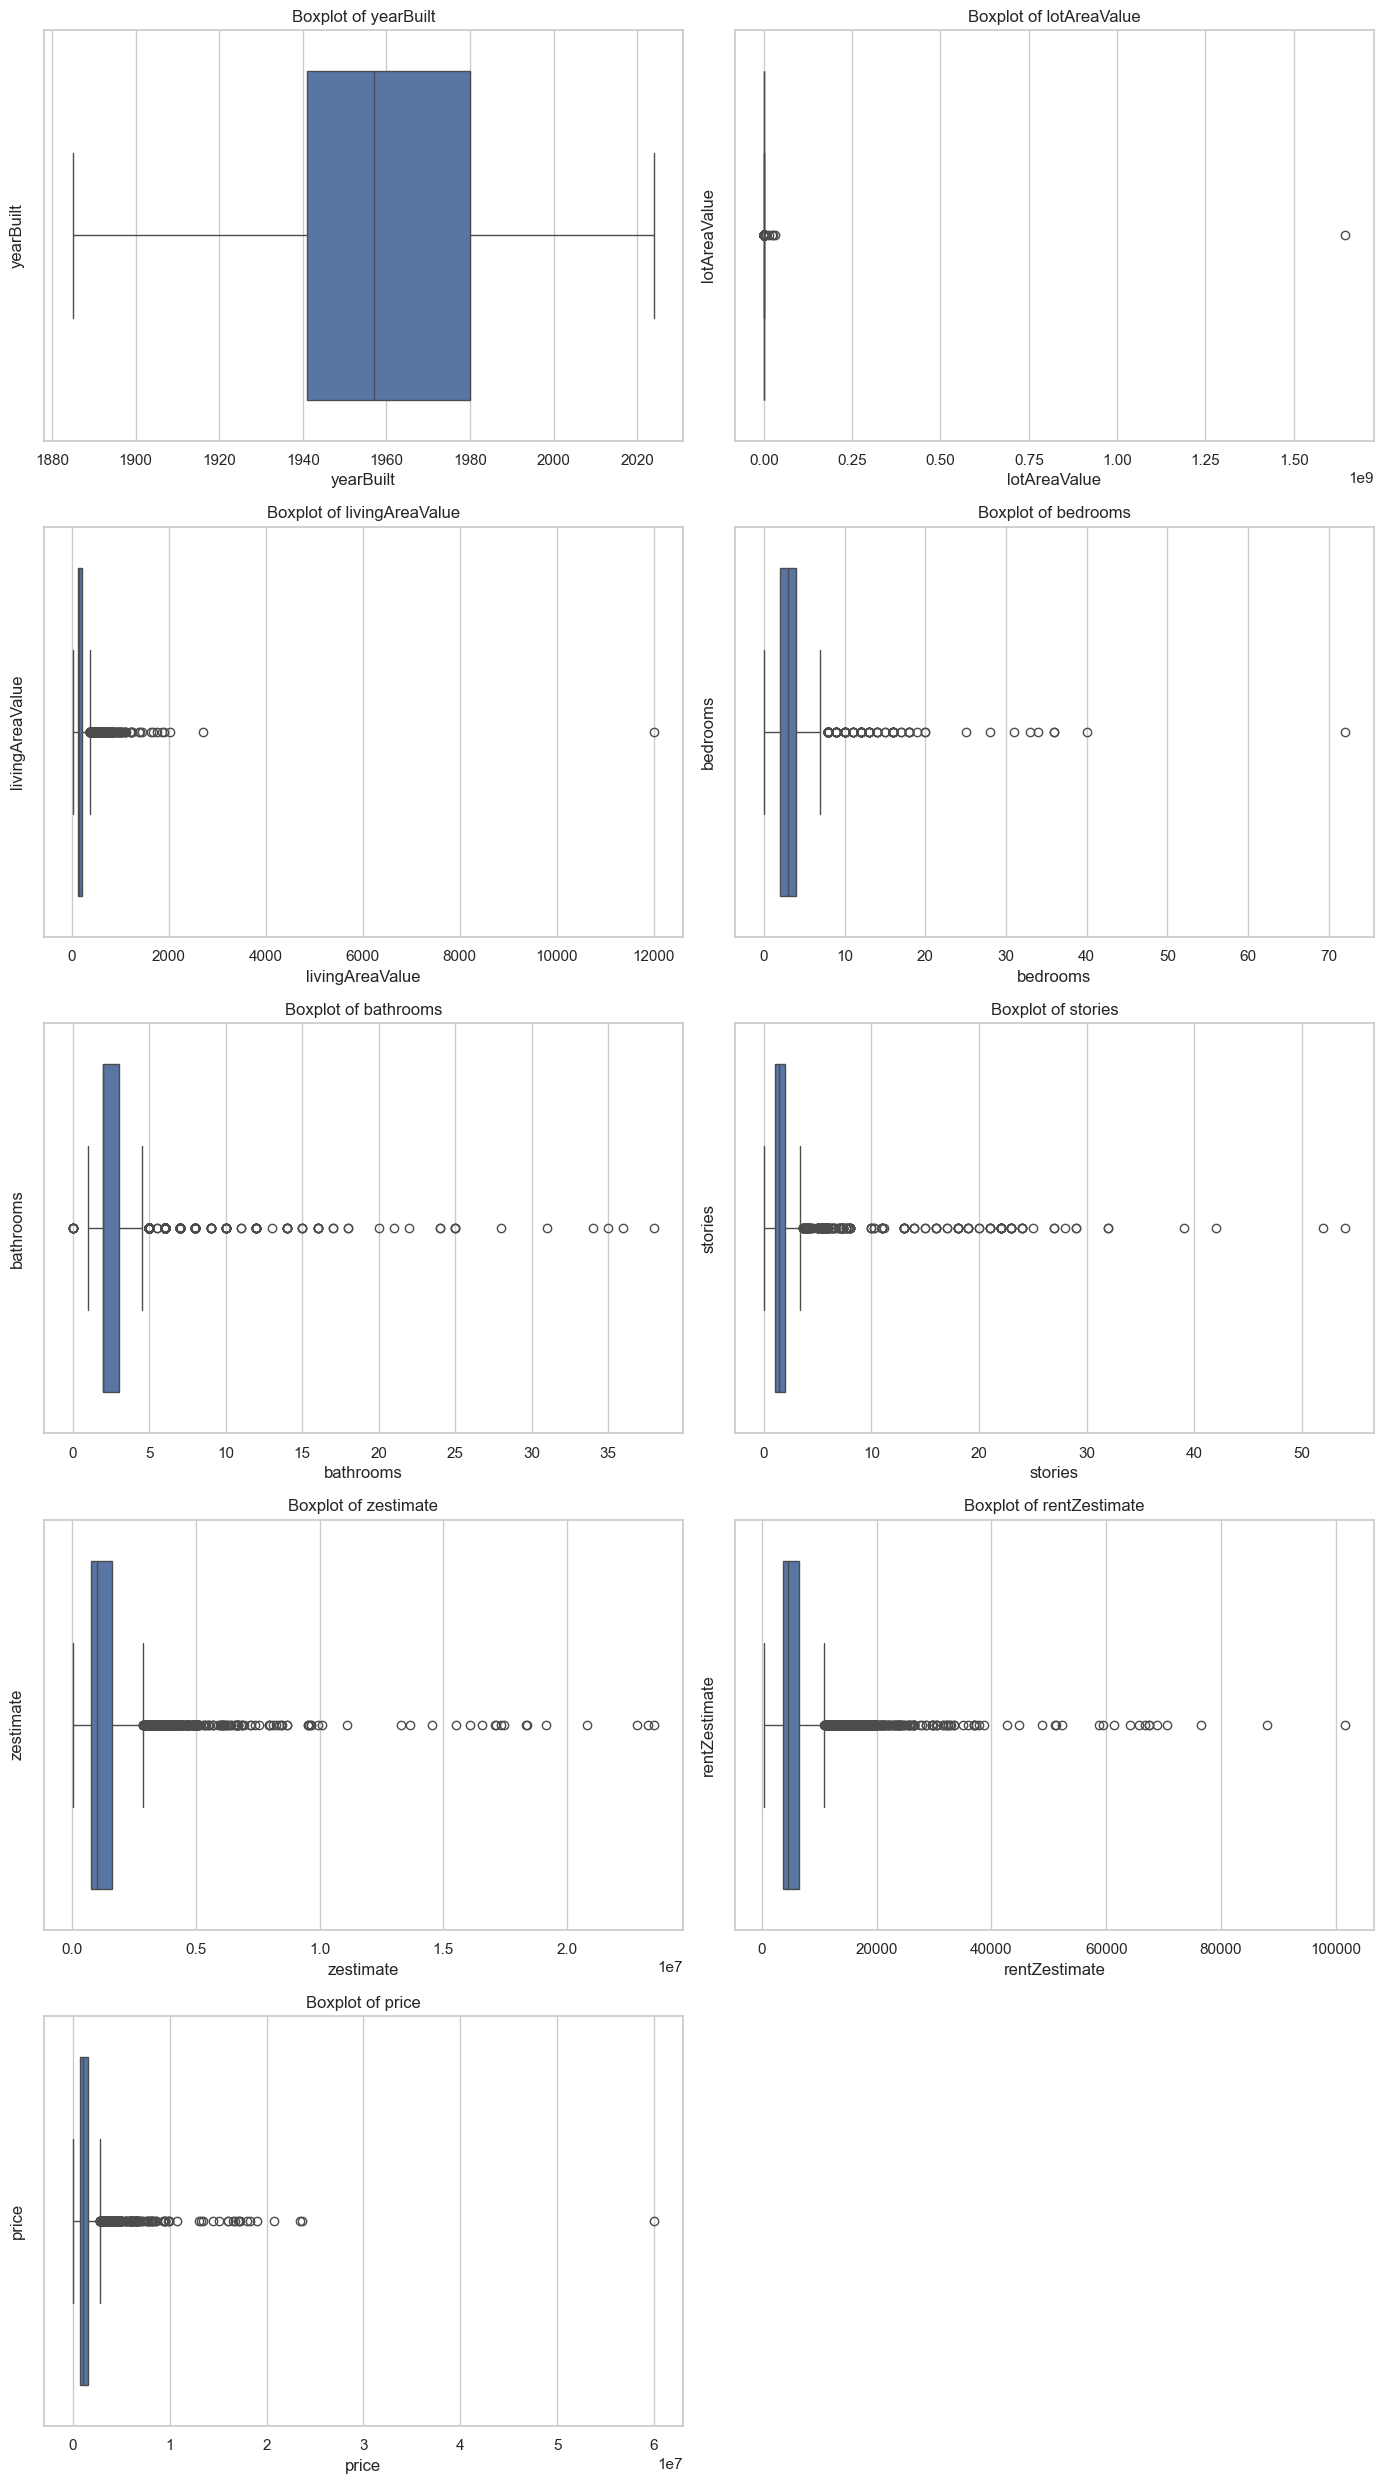

In [172]:
num_cols = 2
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 5 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

In [173]:
def show_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

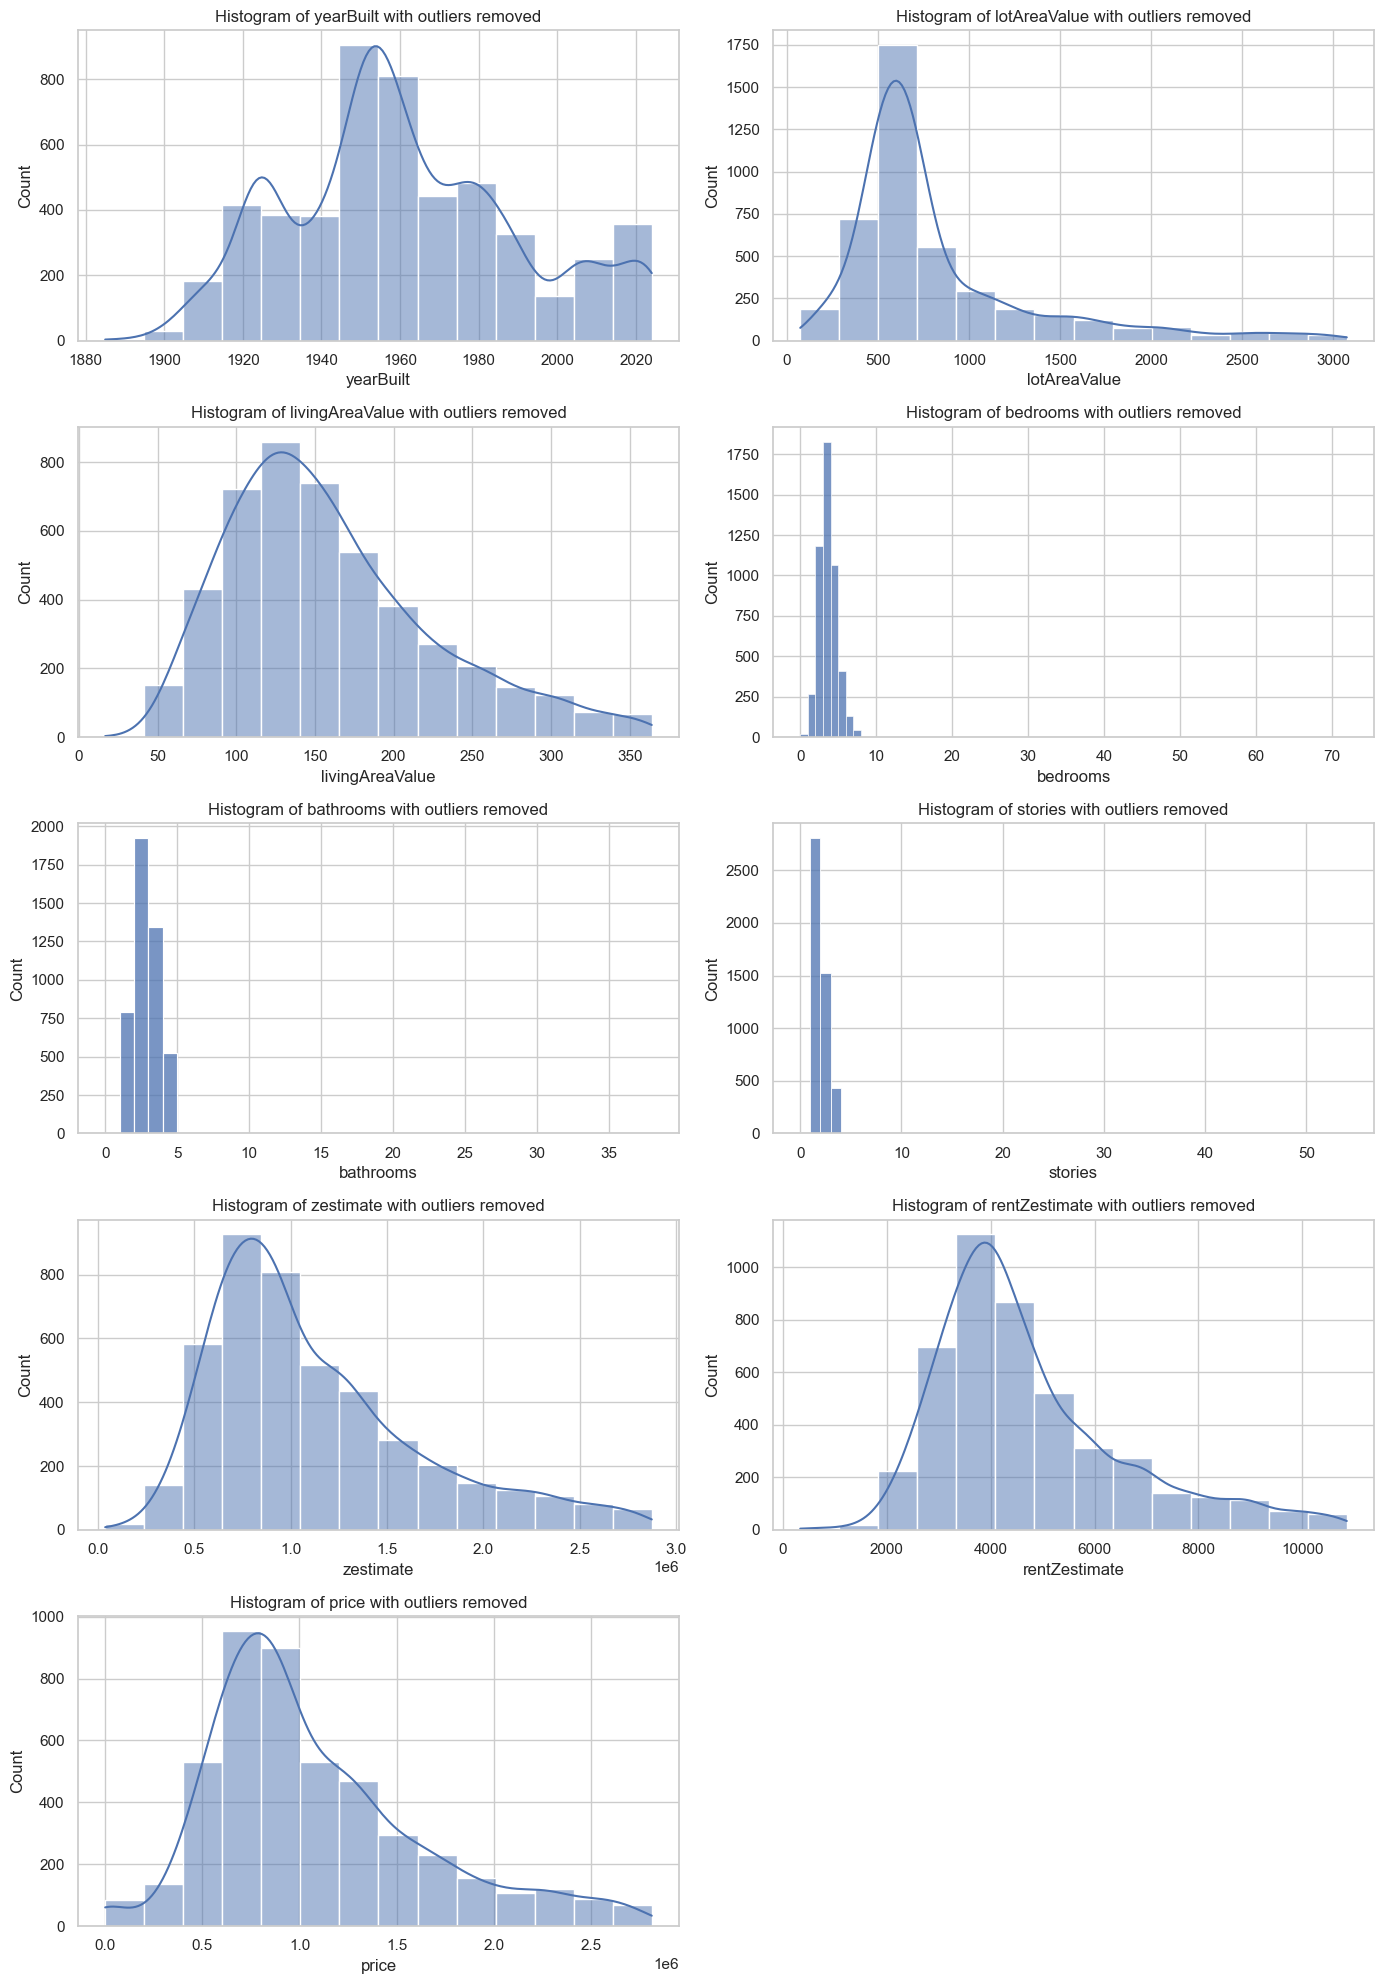

In [174]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    outliers = show_outliers(df, feature)
    df_no_outliers = df.drop(outliers.index)
    data = df_no_outliers[feature]
    if feature in ["bedrooms", "bathrooms", "stories"]:
        bins = range(math.ceil(min(df[feature])), math.ceil(max(df[feature])) + 1)
        sns.histplot(data, bins=bins, kde=False, ax=axes[i])
    else:
        sns.histplot(data, bins='sturges', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature} with outliers removed')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

### Outliers

In [175]:
import math 

def show_boxplot(df, feature):
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()
    
def show_hist(df, feature, discrete = False, bins_alg = calc_num_of_bins_sturges_rule):
    if discrete:
        bins = range(math.ceil(min(df[feature])), math.ceil(max(df[feature])) + 1)
        sns.histplot(df[feature], bins=bins, kde=False)
        plt.xticks(bins)
    else:
        bins = bins_alg(df[feature])
        sns.histplot(df[feature], bins=bins, kde=True)
    
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

#### LotAreaValue

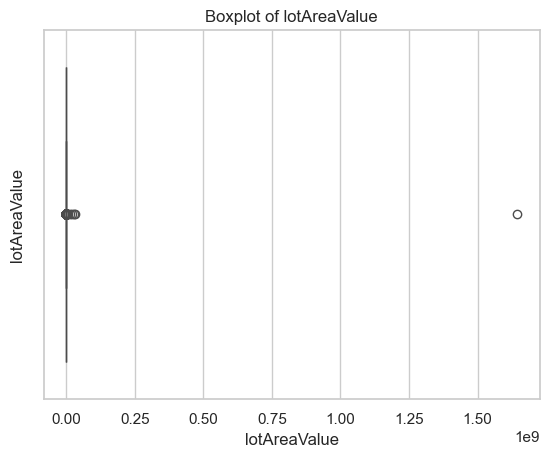

In [176]:
show_boxplot(df, 'lotAreaValue')

In [177]:
df[df['lotAreaValue'] > 1e9]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,rentZestimate,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView
106,91316,5460 White Oak Ave UNIT A214,CONDO,1971,1.644773e+09,91.97397,2,2.0,3.0,['Wood'],...,2498.0,"[('2008-04-24', 210000), ('2007-09-18', 319000...",270000,2,1,1,0,0,1,1


In [178]:
df = df[df['lotAreaValue'] < 1e9]

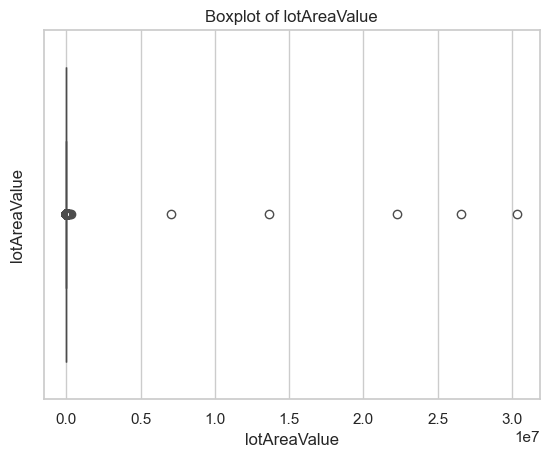

In [179]:
show_boxplot(df, 'lotAreaValue')

In [180]:
df[df['lotAreaValue'] > 1e6]

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,rentZestimate,sold-history,price,parkingCapacity,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView
21,91335,7317 White Oak Ave,SINGLE_FAMILY,1951,22257730.00,47.566336,2,1.0,3.0,[],...,2500.0,[],2500,0,0,0,0,0,0,0
44,91345,14377 Germain St,SINGLE_FAMILY,1955,30351450.00,164.066698,3,2.0,1.0,['Wood'],...,3999.0,"[('2022-02-15', 840000), ('2010-12-01', 339500...",4000,1,1,1,0,0,0,0
1137,90002,9614 Grape St,SINGLE_FAMILY,2024,13658152.50,123.096475,4,3.0,1.0,[],...,3640.0,"[('2022-12-02', 435000), ('2022-09-14', 359803)]",690000,2,1,1,0,0,0,1
3331,90732,2501 Bowfin Ave,SINGLE_FAMILY,1954,26600010.78,138.611276,3,2.0,1.0,[],...,4500.0,"[('2020-05-18', 805000), ('1998-08-28', 329000)]",1280000,2,1,0,1,0,0,1
3800,90024,10727 Wilshire Blvd APT 403,CONDO,2001,7061770.70,162.115735,2,3.5,2.6,[],...,5937.0,"[('2011-09-16', 960000), ('2006-07-05', 135000...",1539473,0,1,1,0,0,0,0


In [181]:
df = df[df['lotAreaValue'] < 1e6]

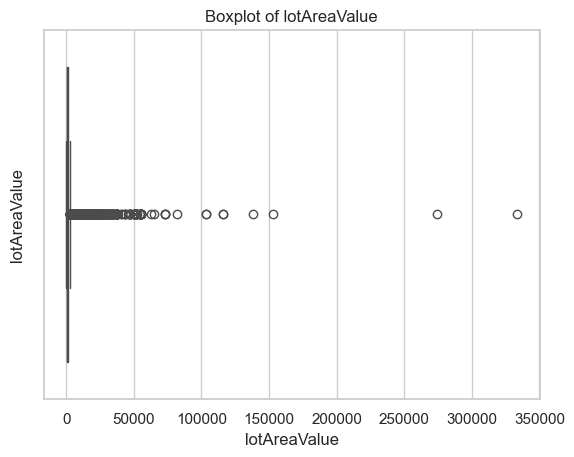

In [182]:
show_boxplot(df, 'lotAreaValue')

In [183]:
lot_area_outliers = show_outliers(df, 'lotAreaValue')
lot_area_outliers['homeType'].value_counts()

homeType
CONDO            519
TOWNHOUSE        219
SINGLE_FAMILY     73
APARTMENT          6
MANUFACTURED       3
MULTI_FAMILY       1
Name: count, dtype: int64

In [184]:
df.loc[df['homeType'].isin(['CONDO', 'APARTMENT', "TOWNHOUSE"]), 'lotAreaValue'] = df['livingAreaValue']

In [185]:
df.drop(lot_area_outliers[~lot_area_outliers['homeType'].isin(['CONDO', 'APARTMENT', "TOWNHOUSE"])].index, inplace=True)

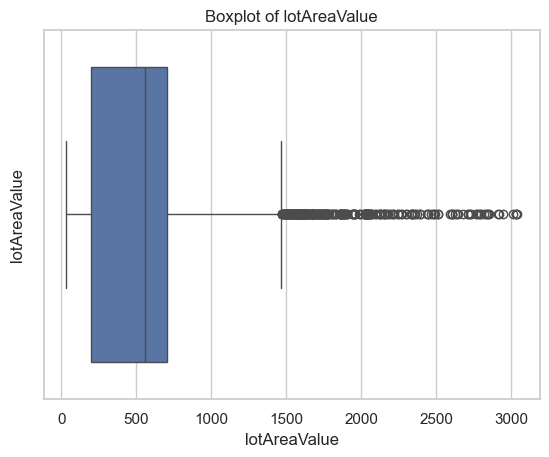

In [186]:
show_boxplot(df, 'lotAreaValue')

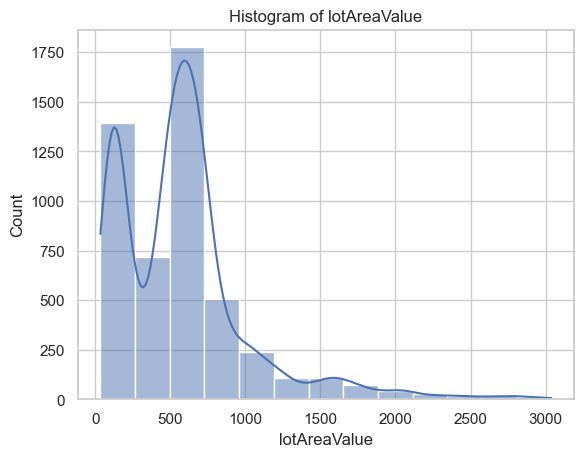

In [187]:
show_hist(df, 'lotAreaValue', bins_alg=calc_num_of_bins_sturges_rule)

#### Living Area

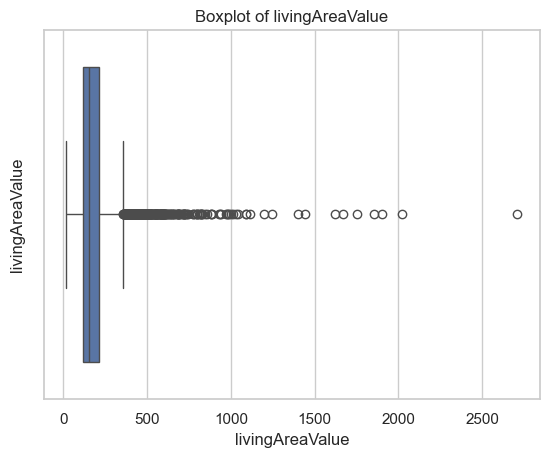

In [188]:
show_boxplot(df, 'livingAreaValue')

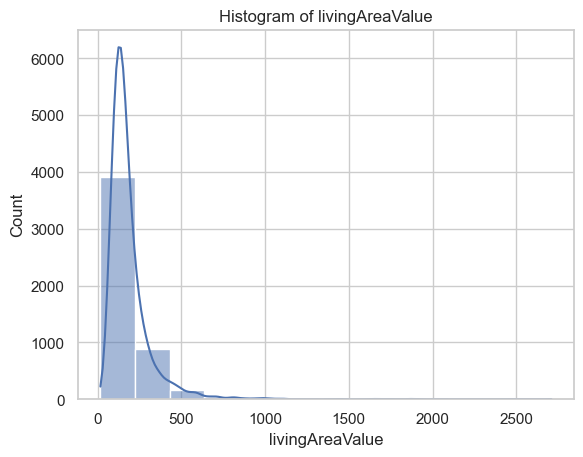

In [189]:
show_hist(df, 'livingAreaValue')

In [190]:
df = df[df["livingAreaValue"] < 1000]

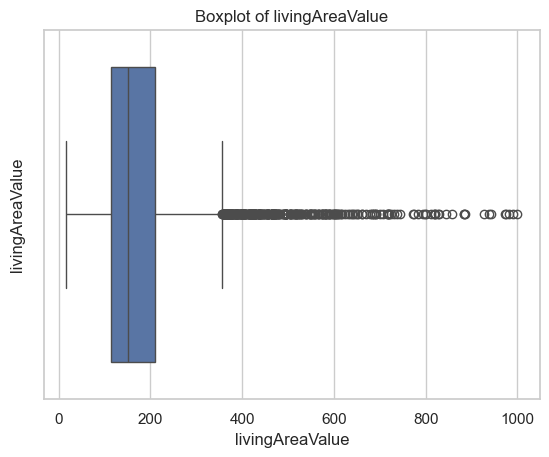

In [191]:
show_boxplot(df, 'livingAreaValue')

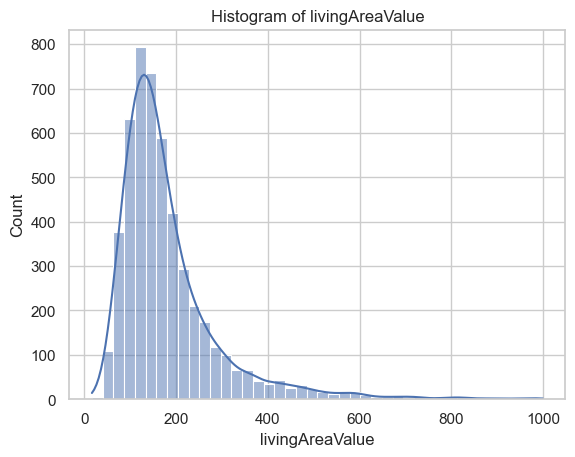

In [192]:
show_hist(df, 'livingAreaValue', bins_alg=calc_num_of_bins_scott_rule)

#### bedrooms

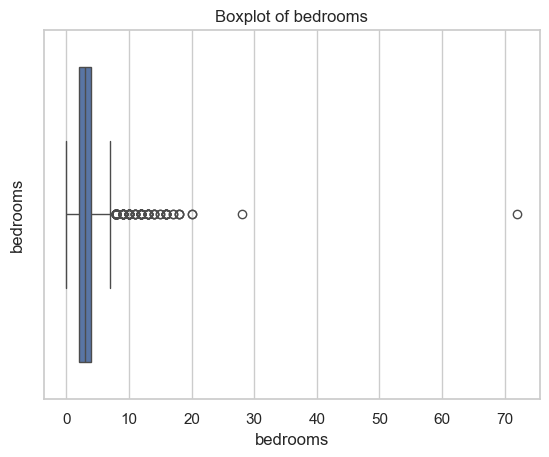

In [193]:
show_boxplot(df, 'bedrooms')

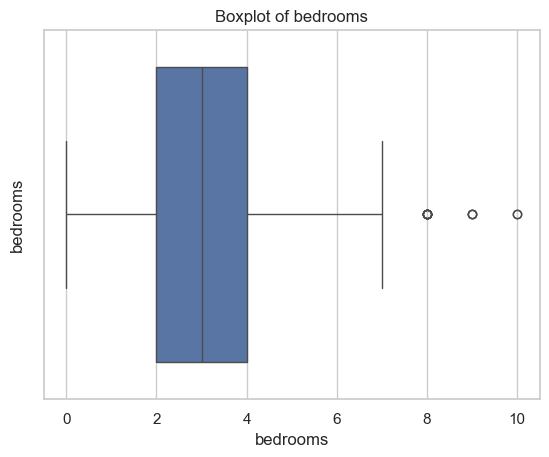

In [194]:
show_boxplot(df[df["homeType"] != "MULTI_FAMILY"], 'bedrooms')

In [195]:
df[df["homeType"] != "MULTI_FAMILY"]["bedrooms"].value_counts()

bedrooms
3     1774
2     1148
4      941
5      340
1      262
6       76
0       16
7       15
8        8
9        3
10       2
Name: count, dtype: int64

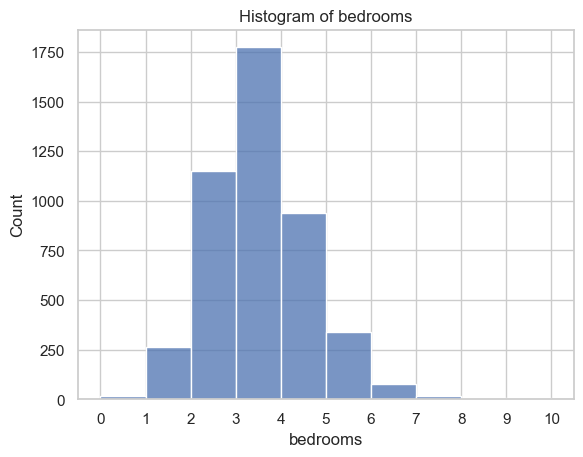

In [196]:
show_hist(df[df["homeType"] != "MULTI_FAMILY"], 'bedrooms', discrete=True)

#### bathrooms

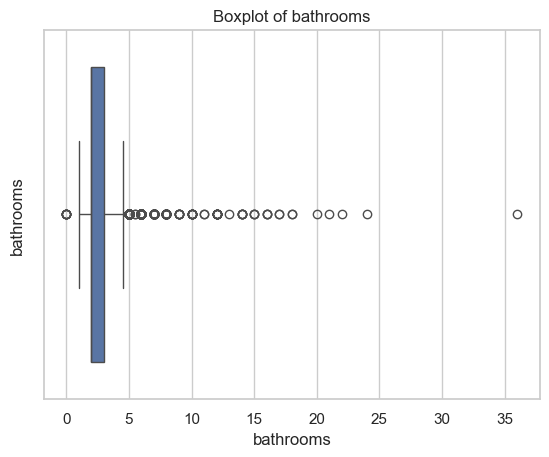

In [197]:
show_boxplot(df, 'bathrooms')

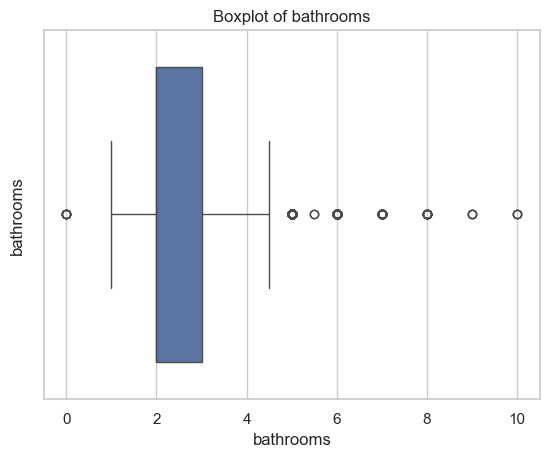

In [198]:
show_boxplot(df[df["homeType"] != "MULTI_FAMILY"], 'bathrooms')

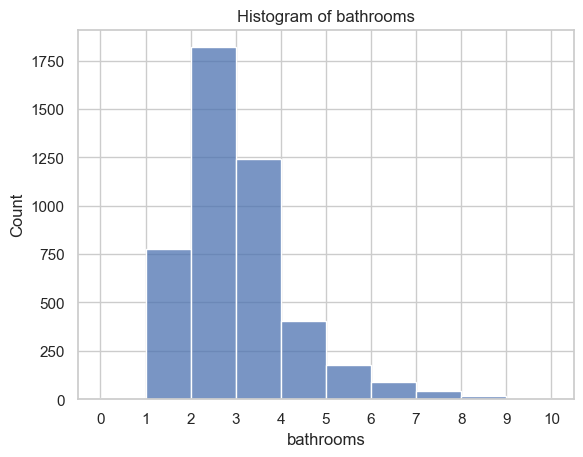

In [199]:
show_hist(df[df["homeType"] != "MULTI_FAMILY"], 'bathrooms', discrete=True)

#### stories

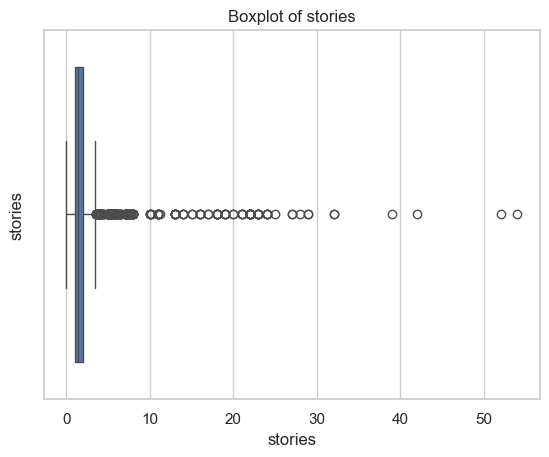

In [200]:
show_boxplot(df, 'stories')

#### price


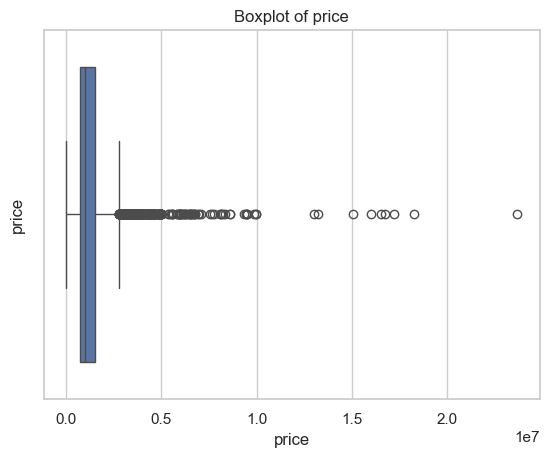

In [201]:
show_boxplot(df, 'price')

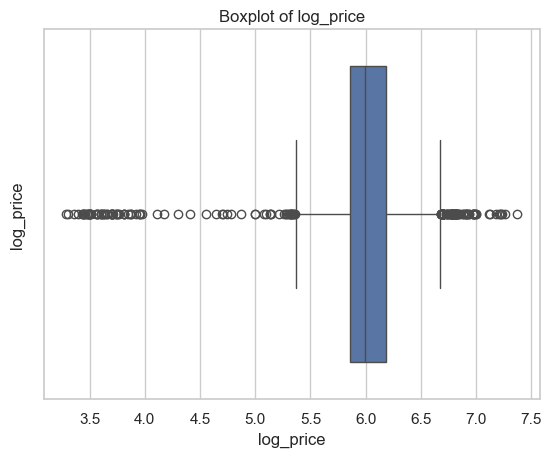

In [202]:
df["log_price"] = np.log10(df['price'])
show_boxplot(df, 'log_price')

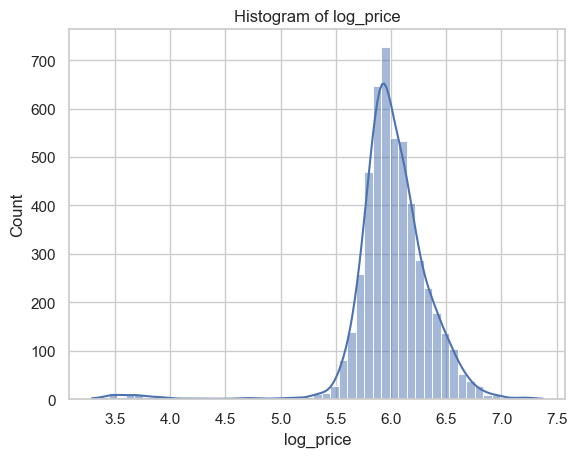

In [203]:
show_hist(df, 'log_price', bins_alg=calc_num_of_bins_scott_rule)

In [204]:
show_outliers(df, 'log_price')[["zestimate", "price"]]

,zestimate,price
0,701200.0,3050
1,734100.0,3100
2,464800.0,2800
4,498300.0,3100
5,743900.0,3100
...,...,...
5098,NaN,16000000
5099,13650900.0,13250000
5100,17094300.0,16750000
5101,13303200.0,12999000


In [205]:
df["zestimate/price"] = df["zestimate"] / df["price"]

In [206]:
df["zestimate/price"].describe()

count    4758.000000
mean        3.879328
std        26.285204
min         0.321809
25%         1.006226
50%         1.016456
75%         1.026692
max       409.863014
Name: zestimate/price, dtype: float64

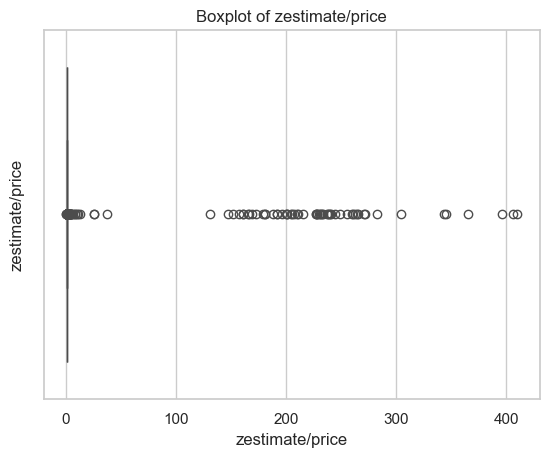

In [208]:
show_boxplot(df, 'zestimate/price')

In [209]:
df = df[df["zestimate/price"] < 10]

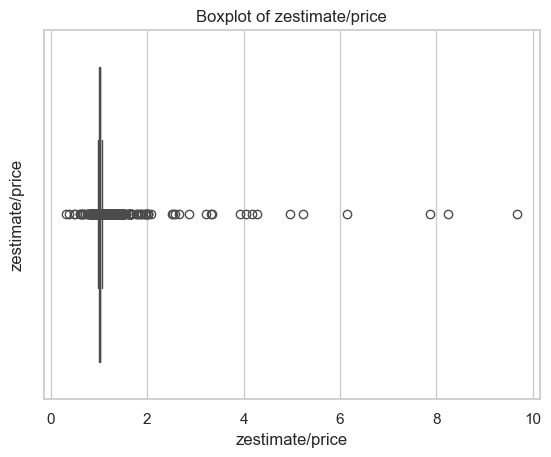

In [210]:
show_boxplot(df, 'zestimate/price')

In [211]:
df = df[df["zestimate/price"] < 2]

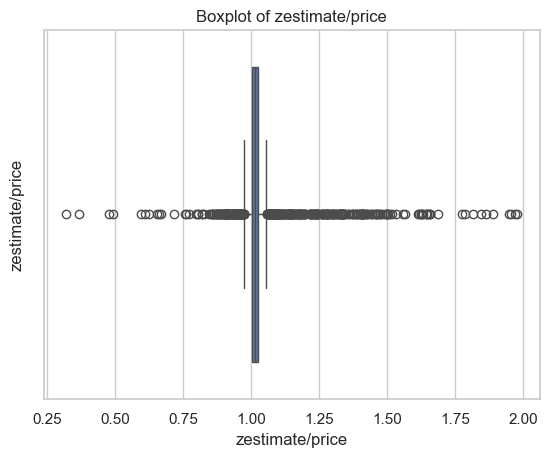

In [212]:
show_boxplot(df, 'zestimate/price')

In [213]:
df = df[df["zestimate/price"] > 0.5]

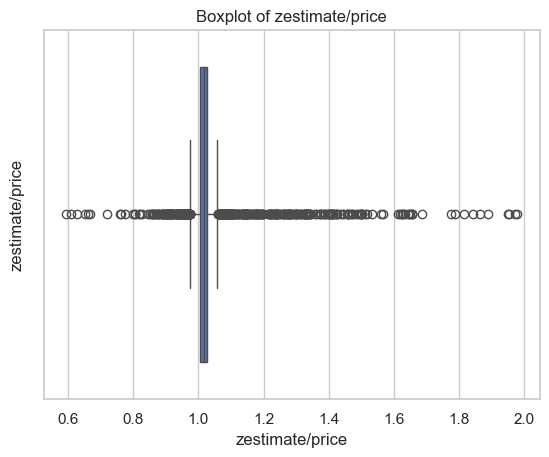

In [214]:
show_boxplot(df, 'zestimate/price')

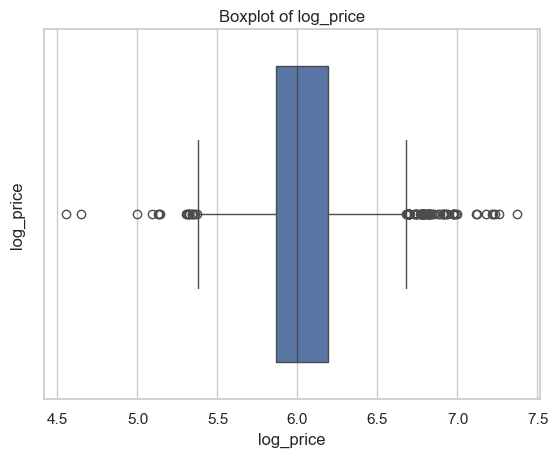

In [215]:
show_boxplot(df, "log_price")

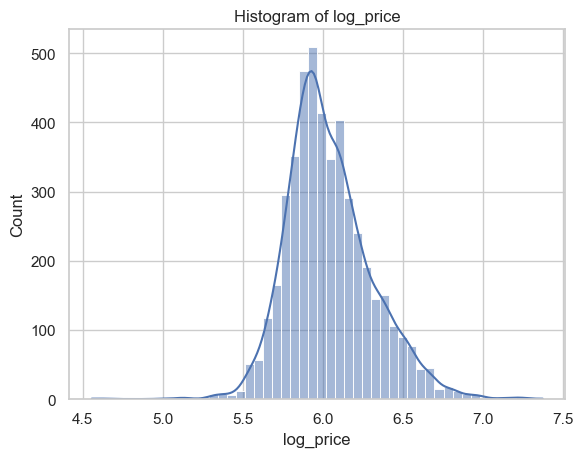

In [216]:
show_hist(df, "log_price", bins_alg=calc_num_of_bins_scott_rule)

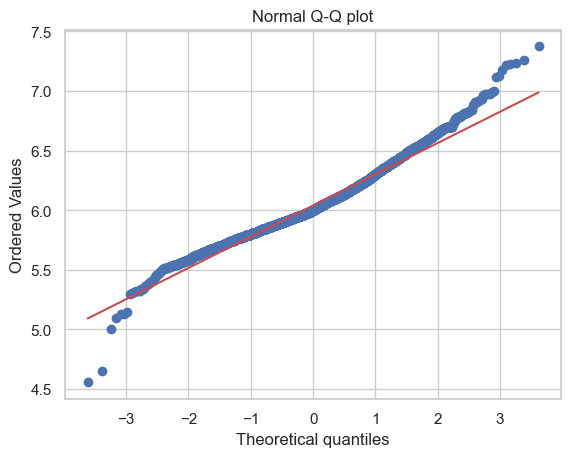

In [217]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['log_price'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [218]:
df["homeType"].value_counts()

homeType
SINGLE_FAMILY    3073
CONDO             892
MULTI_FAMILY      390
TOWNHOUSE         293
APARTMENT          11
MANUFACTURED        8
LOT                 2
Name: count, dtype: int64